In [1]:
%matplotlib inline
%load_ext memory_profiler

import pandas as pd
import os
import sys
import glob
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
import scanpy as sc
import math
from scipy import sparse
import scvelo as scv

# settings
plt.rc('font', size = 9)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['text.usetex']=False
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.grid']=False
plt.rcParams['legend.markerscale']=0.5
sc.set_figure_params(dpi=300,dpi_save=600,
                     frameon=False,
                     fontsize=9)
plt.rcParams['savefig.dpi']=600
sc.settings.verbosity=2
sc._settings.ScanpyConfig.n_jobs=-1
sns.set_style("ticks")



In [2]:
%%memit
adata_file = '/home/ngr4/project/scnd/data/processed/mouse_200614.h5ad'
adata = sc.read(adata_file)

peak memory: 10769.69 MiB, increment: 10578.22 MiB


In [3]:

# read in looms
## point to directory where ./sample1 ./sample2, etc. exists and ./sample/*loom exists
loom_fpath = '/home/ngr4/project/scnd/data/*wk/'
loom_files = glob.glob(os.path.join(loom_fpath,'*/*.loom'))
sample_names = [os.path.split(os.path.split(loom_files[i])[0])[1] for i in range(len(loom_files))]

adata_looms = {}
for i in range(len(loom_files)):
    start = time.time()
    if i == 0:
        adata_loom = scv.read_loom(loom_files[i],sparse=True,cleanup=True)
        adata_loom.var_names_make_unique()
    else:
        adata_looms[sample_names[i]] = scv.read_loom(loom_files[i],sparse=True,cleanup=True)
        adata_looms[sample_names[i]].var_names_make_unique()
try:
    adata_loom = adata_loom.concatenate(*adata_looms.values(), batch_categories=sample_names)
except InvalidIndexError:
    adata_loom = adata_loom.concatenate(*adata_looms.values(), batch_categories=sample_names)
    
if True:
    # merge with existing adata
    adata = scv.utils.merge(adata, adata_loom)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Vari

In [4]:
adata

AnnData object with n_obs × n_vars = 312002 × 26374
    obs: 'batch', 'genotype', 'timepoint', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pmito', 'n_genes', 'louvain', 'res_sca1', 'ees_sca1', 'stored_ctype', 'ctype', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_phate', 'X_umap'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [5]:
adata.obs.groupby('ctype').count()

,batch,genotype,timepoint,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,...,pmito,n_genes,louvain,res_sca1,ees_sca1,stored_ctype,sample_batch,initial_size_spliced,initial_size_unspliced,initial_size
ctype,,,,,,,,,,,,,,,,,,,,,
Astrocyte,8176,8176,8176,8176,8176,8176,8176,8176,8176,8176,...,8176,8176,8176,8176,8176,8176,8176,8176,8176,8176
Bergmann glia,9566,9566,9566,9566,9566,9566,9566,9566,9566,9566,...,9566,9566,9566,9566,9566,9566,9566,9566,9566,9566
Endothelial cell,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,...,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017
GABAergic interneuron 1,13609,13609,13609,13609,13609,13609,13609,13609,13609,13609,...,13609,13609,13609,13609,13609,13609,13609,13609,13609,13609
GABAergic interneuron 2,3879,3879,3879,3879,3879,3879,3879,3879,3879,3879,...,3879,3879,3879,3879,3879,3879,3879,3879,3879,3879
GABAergic interneuron 3,891,891,891,891,891,891,891,891,891,891,...,891,891,891,891,891,891,891,891,891,891
Granule cell,254793,254793,254793,254793,254793,254793,254793,254793,254793,254793,...,254793,254793,254793,254793,254793,254793,254793,254793,254793,254793
Microglia,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,...,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003
Oligodendrocyte,9316,9316,9316,9316,9316,9316,9316,9316,9316,9316,...,9316,9316,9316,9316,9316,9316,9316,9316,9316,9316


In [4]:
# subset data to one cell type (oligodendrocyte, e.g.)
sdata = adata[(adata.obs['ctype']=='Ol cell'), :]

In [7]:
# standard recipe for pancreas; REF: 
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=10, n_neighbors=30)
scv.pp.moments(adata, n_pcs=10, n_neighbors=30)

computing PCA
    with n_comps=50
    finished (0:00:24)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:05)


Normalized count data: spliced, unspliced.
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [8]:
scv.tl.recover_dynamics(adata)

recovering dynamics
    finished (0:07:15) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scvelo/tools/dynamical_model.py:683: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scvelo/tools/dynamical_model.py:686: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


In [9]:
scv.tl.velocity(adata, mode='stochastic')
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:07) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


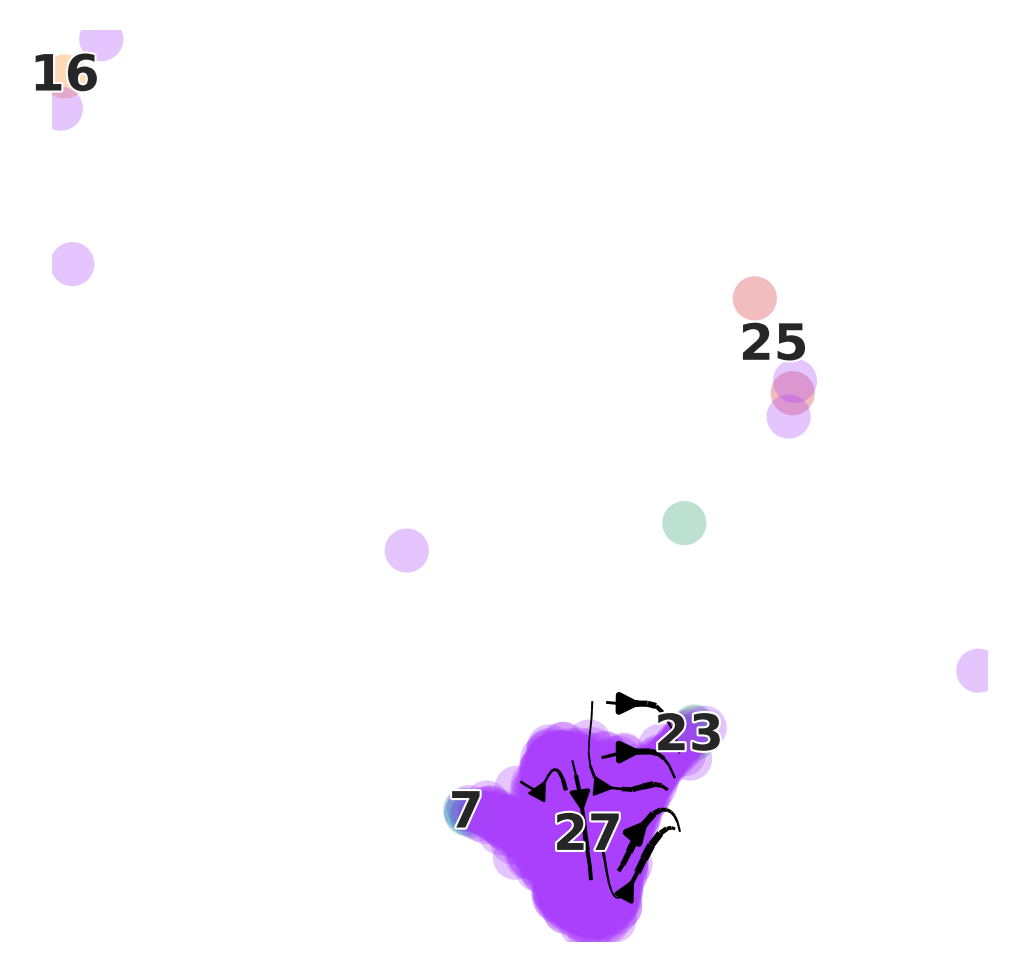

In [10]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_fontsize=12, title='', smooth=.8, min_mass=4)


In [1]:
import cellrank as cr

In [ ]:
sc.tl.leiden(adata)

In [ ]:
cr.tl.terminal_states(adata, cluster_key='leiden', weight_connectivities=0.2)


In [ ]:
cr.tl.root_states(adata, cluster_key='leiden')